# **Linear regression**

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

*Problema:*
Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

In [47]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/demographic_health_data.csv', sep=',')
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

Variables

- fips → Código único del condado según FIPS.
- TOT_POP → Total de habitantes del condado.
- 0-9 → Número de personas entre 0 y 9 años.
- 0-9 y/o % of total pop → Porcentaje de la población con edades entre 0 y 9 años.
- 10-19 → Número de personas entre 10 y 19 años (nombre incorrecto por error de formato).
- 10-19 y/o % of total pop → Porcentaje de personas entre 10 y 19 años.
- 20-29 → Número de personas entre 20 y 29 años.
- 20-29 y/o % of total pop → Porcentaje de personas entre 20 y 29 años.
- 30-39 → Número de personas entre 30 y 39 años.
- 30-39 y/o % of total pop → Porcentaje de personas entre 30 y 39 años.
- 40-49 → Número de personas entre 40 y 49 años.
- 40-49 y/o % of total pop → Porcentaje de personas entre 40 y 49 años.
- 50-59 → Número de personas entre 50 y 59 años.
- 50-59 y/o % of total pop → Porcentaje de personas entre 50 y 59 años.
- 60-69 → Número de personas entre 60 y 69 años.
- 60-69 y/o % of total pop → Porcentaje de personas entre 60 y 69 años.
- 70-79 → Número de personas entre 70 y 79 años.
- 70-79 y/o % of total pop → Porcentaje de personas entre 70 y 79 años.
- 80+ → Número de personas de 80 años o más.
- 80+ y/o % of total pop → Porcentaje de personas de 80 años o más.
-
-
- Cancer_prevalence → Porcentaje de personas con diagnóstico de cáncer.
- Cancer_Lower 95% CI → Límite inferior del intervalo de confianza del 95% para la prevalencia de cáncer.
- Cancer_Upper 95% CI → Límite superior del intervalo de confianza del 95% para la prevalencia de cáncer.
- Cancer_number → Número estimado de personas con cáncer.
-
-
- Obesity_prevalence → Porcentaje de personas con obesidad.
- Obesity_Lower 95% CI → Límite inferior del 95% para obesidad.
- Obesity_Upper 95% CI → Límite superior del 95% para obesidad.
- Obesity_number → Número estimado de personas con obesidad.
-
-
- Heart disease_prevalence → Porcentaje de personas con enfermedad cardíaca.
- Heart disease_Lower 95% CI → Límite inferior del 95% para enfermedad cardíaca.
- Heart disease_Upper 95% CI → Límite superior del 95% para enfermedad cardíaca.
- Heart disease_number → Número estimado de casos de enfermedad cardíaca.
-
-
- COPD_prevalence → Porcentaje de personas con EPOC (enfermedad pulmonar obstructiva crónica).
- COPD_Lower 95% CI → Límite inferior del 95% para EPOC.
- COPD_Upper 95% CI → Límite superior del 95% para EPOC.
- COPD_number → Número estimado de personas con EPOC.
-
-
- diabetes_prevalence → Porcentaje de personas con diabetes.
- diabetes_Lower 95% CI → Límite inferior del 95% para diabetes.
- diabetes_Upper 95% CI → Límite superior del 95% para diabetes.
- diabetes_number → Número estimado de personas con diabetes.
-
-
- CKD_prevalence → Porcentaje de personas con enfermedad renal crónica.
- CKD_Lower 95% CI → Límite inferior del 95% para CKD.
- CKD_Upper 95% CI → Límite superior del 95% para CKD.
- CKD_number → Número estimado de personas con CKD.

- Urban_rural_code → Código que clasifica el condado como urbano o rural.

In [48]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


(None, (3140, 108))

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

In [52]:
df = df.drop(["0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", "Asian-alone pop",
              "Hawaiian/Pacific Islander-alone pop", "Two or more races pop", "Less than a high school diploma 2014-18", "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
              "Bachelor's degree or higher 2014-18", "POP_ESTIMATE_2018", "N_POP_CHG_2018", "GQ_ESTIMATES_2018", "R_birth_2018", "R_death_2018", "R_NATURAL_INC_2018", "R_INTERNATIONAL_MIG_2018",
              "R_DOMESTIC_MIG_2018", "R_NET_MIG_2018", "POVALL_2018","PCTPOV017_2018", "PCTPOV517_2018", "CI90LBINC_2018", "CI90UBINC_2018", "Employed_2018", "Unemployed_2018", "Median_Household_Income_2018",
              "COUNTY_NAME", "STATE_NAME", "STATE_FIPS", "CNTY_FIPS", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI",
              "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI"], axis = 1)

In [53]:
df.columns

Index(['fips', 'TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Populatio

In [54]:
age_columns = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
               "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop", "diabetes_prevalence"]

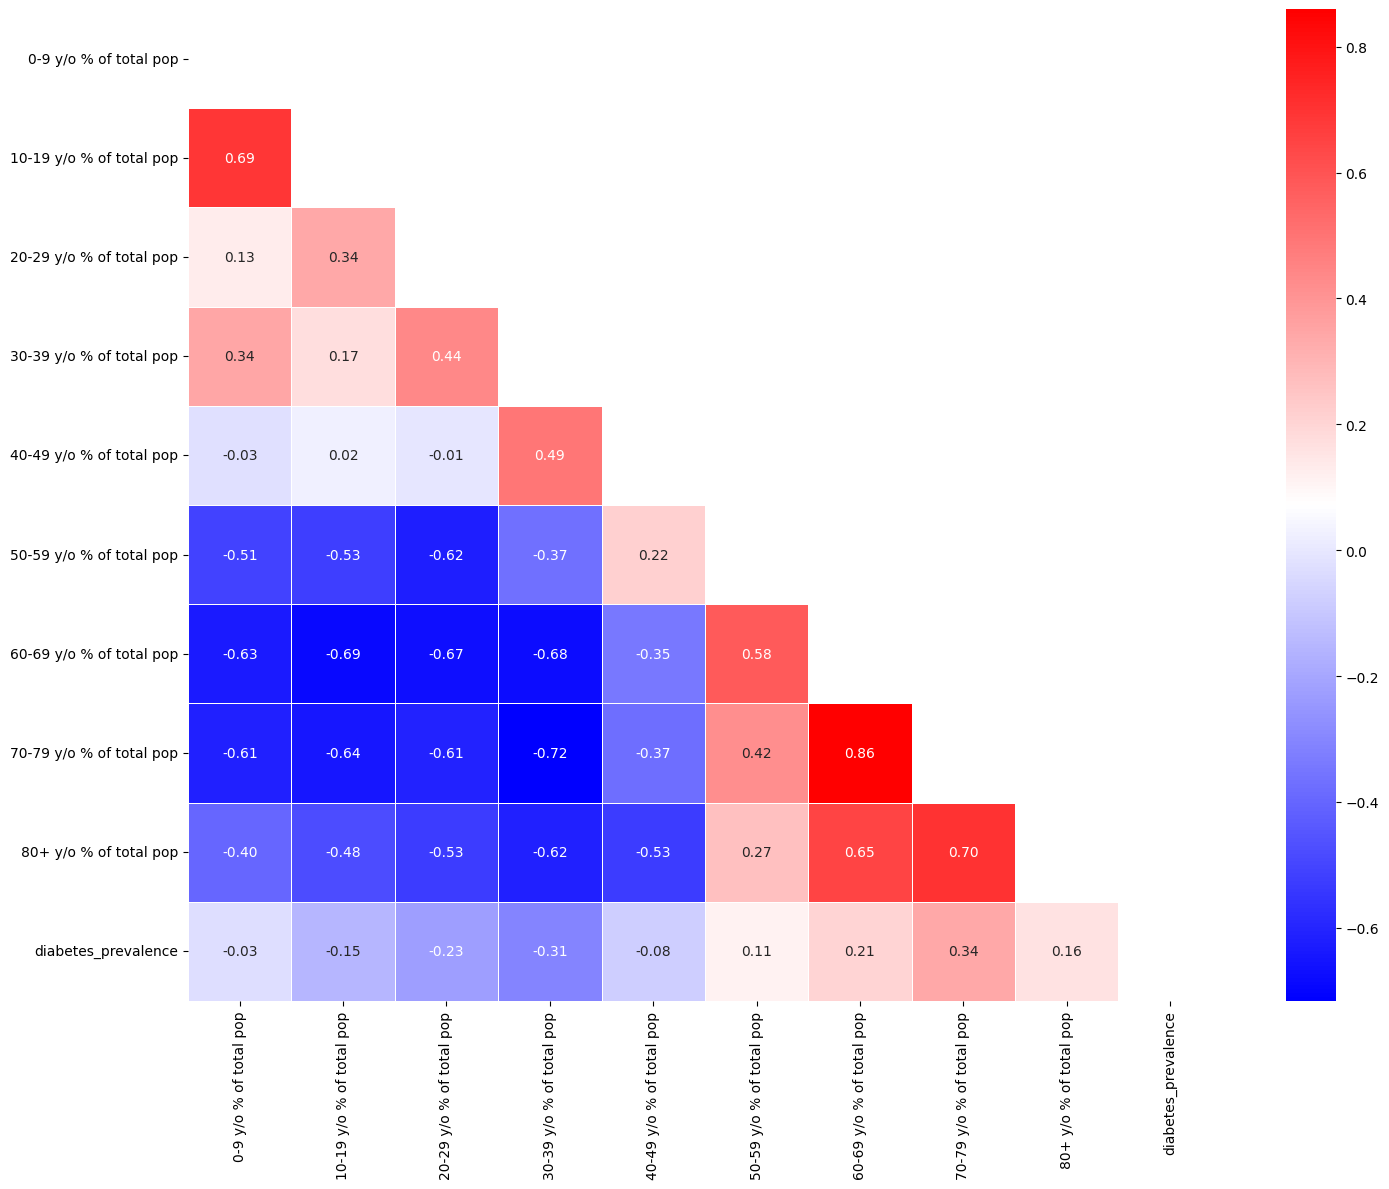

In [55]:
corr = df[age_columns].corr

corr = df[age_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()